In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
pd.options.display.max_colwidth=1000
import re

In [12]:
trump_df = pd.read_csv('Trumpall2.csv')

In [13]:
biden_df = pd.read_csv('Bidenall2.csv')

In [14]:
trump_df.head()

,user,text
0,manny_rosen,@sanofi please tell us how many shares the Criminal Trump Enterprise owns.
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #Prayer4TachaNTitans #Prayer4TachaNTitans"
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as you are Rep. Pramila Jayapal #SheGotItRight
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments below your tweets are nothing but cartoons and ridicule!… https://t.co/ZboyK43K9M
4,James09254677,After 4 years you think you would have figured out your horrendous spray tan situation


In [15]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    2788 non-null   object
 1   text    2788 non-null   object
dtypes: object(2)
memory usage: 43.7+ KB


In [16]:
trump_df.isnull().sum()

user    0
text    0
dtype: int64

# Data cleaning

In [17]:
# removing symbols and links

def remove_links_symbols(tweet):
    s2 = re.sub('http://\S+|https://\S+', '', tweet)
    s1=re.sub(r"#[a-zA-Z0-9\\n@_\s]+","",s2)
    return s1   

In [18]:
# removing emojis

def remove_emoji(txt):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', txt)

In [22]:
# list of stop words

stpwrds = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 
           "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 
           'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 
           'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
           "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 
           'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as',
           'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
           'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
           'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
           'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
           's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain',
           'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 
           'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', 
           "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"] 

In [6]:
biden_df.head()

,user,text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...
2,OldlaceA,@JoeBiden So did Lying Barr
3,penblogger,@JoeBiden It's clear you didnt compose this tw...
4,Aquarian0264,@JoeBiden I will vote in person thank you.


In [37]:
def TweetCleaning(tweet):
    link_removal=remove_links_symbols(tweet)
    emoji_removal=remove_emoji(link_removal)
    after_stopword_removal=' '.join(word for word in emoji_removal.split()if word not in stpwrds)
    return after_stopword_removal

# Data Processing

In [38]:
def calcPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [39]:
def calcSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

In [40]:
def segmentation(tweet):
    if tweet > 0:
        return 'positive'
    elif tweet == 0 :
        return 'neutral'
    else:
        return 'negative'

In [41]:
trump_df["CleanedTweet"]=trump_df["text"].apply(TweetCleaning)
trump_df['tPolarity']=trump_df['CleanedTweet'].apply(calcPolarity)
trump_df['tSubjectivity']=trump_df['CleanedTweet'].apply(calcSubjectivity)
trump_df['segmentation']=trump_df['tPolarity'].apply(segmentation)

In [42]:
trump_df.head()

,user,text,CleanedTweet,tPolarity,tSubjectivity,segmentation
0,manny_rosen,@sanofi please tell us how many shares the Criminal Trump Enterprise owns.,@sanofi please tell us many shares Criminal Trump Enterprise owns.,0.05,0.525,positive
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #Prayer4TachaNTitans #Prayer4TachaNTitans","Like, comment, RT",0.00,0.000,neutral
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as you are Rep. Pramila Jayapal #SheGotItRight,Your AG Barr useless &amp; corrupt Rep. Pramila Jayapal,-0.50,0.600,negative
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments below your tweets are nothing but cartoons and ridicule!… https://t.co/ZboyK43K9M,Mr. Trump! Wake Up! Most comments tweets nothing cartoons ridicule!…,0.50,0.500,positive
4,James09254677,After 4 years you think you would have figured out your horrendous spray tan situation,After 4 years think would figured horrendous spray tan situation,0.00,0.000,neutral


# Data Vizualization

In [43]:
trump_df['segmentation'].value_counts()

segmentation
neutral     1531
positive     676
negative     581
Name: count, dtype: int64

## Word Cloud

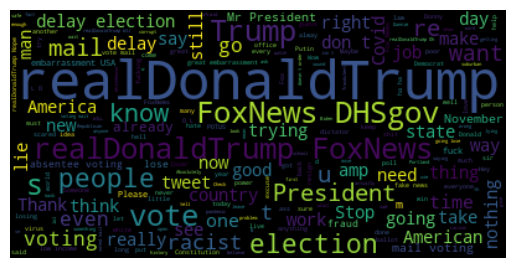

In [45]:
consolidated=' '.join(word for word in trump_df['CleanedTweet'])
wordCloud=WordCloud(width=400,height=200,random_state=20,max_font_size=119).generate(consolidated)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

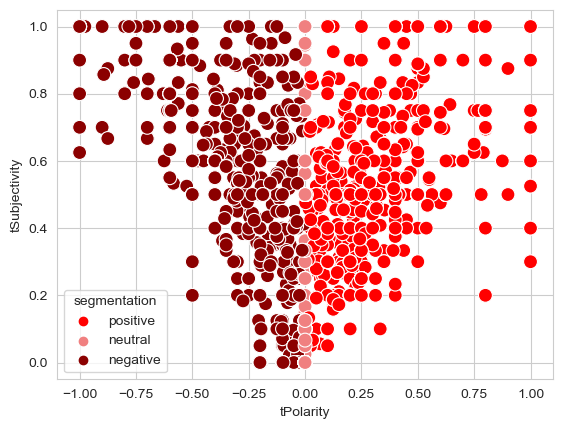

In [70]:
sns.set_style('whitegrid')
colors = {'negative': 'blue', 'positive': 'red%%file, 'neutral': 'pink'}
sns.scatterplot(data=trump_df, x='tPolarity', y='tSubjectivity', s=100, hue='segmentation', palette=colors)
plt.show()

<Axes: xlabel='segmentation', ylabel='count'>

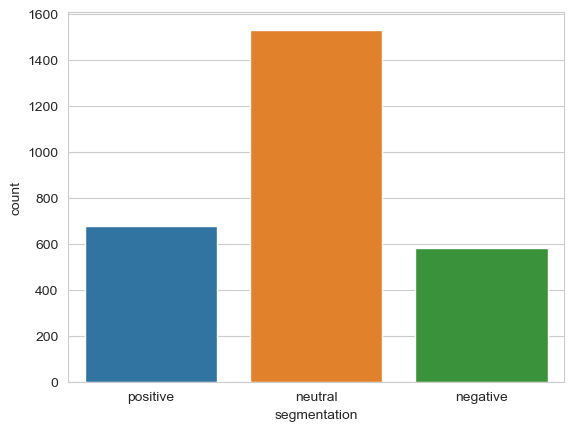

In [56]:
sns.countplot(data=trump_df,x='segmentation')

In [57]:
biden_df.head()

,user,text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be trusted https://t.co/boNiI0vjL0
2,OldlaceA,@JoeBiden So did Lying Barr
3,penblogger,@JoeBiden It's clear you didnt compose this tweet. You cant put ONE sentence together and they usually last 10 minutes.
4,Aquarian0264,@JoeBiden I will vote in person thank you.


In [58]:
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    2540 non-null   object
 1   text    2540 non-null   object
dtypes: object(2)
memory usage: 39.8+ KB


In [59]:
biden_df.isnull().sum()

user    0
text    0
dtype: int64

In [60]:
biden_df["CleanedTweet"]=biden_df["text"].apply(TweetCleaning)
biden_df['tPolarity']=biden_df['CleanedTweet'].apply(calcPolarity)
biden_df['tSubjectivity']=biden_df['CleanedTweet'].apply(calcSubjectivity)
biden_df['segmentation']=biden_df['tPolarity'].apply(segmentation)

In [63]:
biden_df.head()

,user,text,CleanedTweet,tPolarity,tSubjectivity,segmentation
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,@JoeBiden And we’ll find 2026...,0.00,0.000,neutral
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be trusted https://t.co/boNiI0vjL0,@JoeBiden Your Democratic Nazi Party cannot trusted,0.00,0.000,neutral
2,OldlaceA,@JoeBiden So did Lying Barr,@JoeBiden So Lying Barr,0.00,0.000,neutral
3,penblogger,@JoeBiden It's clear you didnt compose this tweet. You cant put ONE sentence together and they usually last 10 minutes.,@JoeBiden It's clear didnt compose tweet. You cant put ONE sentence together usually last 10 minutes.,0.05,0.225,positive
4,Aquarian0264,@JoeBiden I will vote in person thank you.,@JoeBiden I vote person thank you.,0.00,0.000,neutral


In [64]:
biden_df['segmentation'].value_counts()

segmentation
neutral     1566
positive     590
negative     384
Name: count, dtype: int64

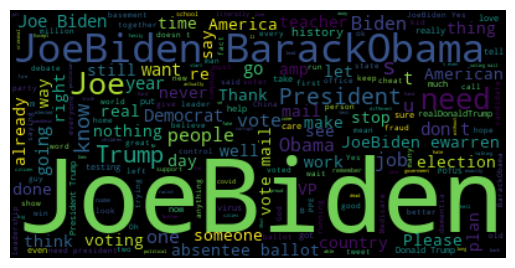

In [65]:
consolidated=' '.join(word for word in biden_df['CleanedTweet'])
wordCloud=WordCloud(width=400,height=200,random_state=20,max_font_size=119).generate(consolidated)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

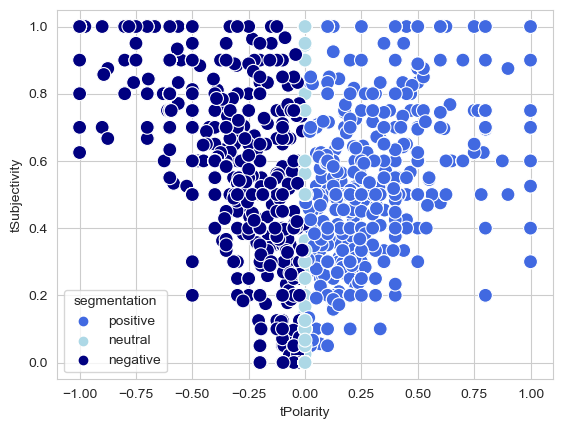

In [68]:
sns.set_style('whitegrid')
colors = {'negative': 'navy', 'positive': 'royalblue', 'neutral': 'lightblue'}
sns.scatterplot(data=trump_df, x='tPolarity', y='tSubjectivity', s=100, hue='segmentation', palette=colors)
plt.show()

In [ ]:
sns.countplot(data=trump_df,x='segmentation')